In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
filepath = "/content/drive/MyDrive/Food App Reviews.csv"

data = pd.read_csv(filepath)

In [ ]:
data

,Review
0,Delivery was faster than a ninja on caffeine. ...
1,Im pretty sure they had a wall made of recycle...
2,Dude Im not even mad they were late. Food arri...
3,Chhole bhature yaar! Sunday indulgence crispy ...
4,The place had a vibe but I cant quite put my f...
...,...
96,Food arrived. I had a taste. Pretty standard.
97,Food was delivered. I ate. Cant complain.
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.
99,Ugh it was so cozy you wouldnt believe. I mean...


In [ ]:
reviews = data['Review'].tolist()

reviews

['Delivery was faster than a ninja on caffeine. Im ready to chow down!',
 'Im pretty sure they had a wall made of recycled cans. Or was it shoes?',
 'Dude Im not even mad they were late. Food arrived like a surprise party!',
 'Chhole bhature yaar! Sunday indulgence crispy bhature FTW.',
 'The place had a vibe but I cant quite put my finger on it. Hipster? Unicorn?',
 'Hakka noodles FTW! Desi-Chinese fusion for life.',
 'Pasta was alright yaar. More masala couldve made it sing.',
 'Im telling you it was like stepping into the future. Or was it the 90s?',
 'I was starving but the food came faster than I could say hangry. Good stuff.',
 'Burgers are my jam but this one was kinda meh. Needed more zing.',
 'Sushi was like a flavor adventure. Mini party in my mouth.',
 'Dude there was like this mural on the wall. It was a cat no wait a panda?',
 'Got the delivery. Ate some. Not bad.',
 'Delivery was like chillin in slow-mo. Ive aged at least a year waiting.',
 'cheesy nirvana bro. Cheese eve

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model_name = "all-MiniLM-L6-v2"

model = SentenceTransformer(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(reviews)

In [ ]:
embeddings

array([[-0.02161551, -0.02379038,  0.01384506, ..., -0.06156021,
         0.01630174,  0.00554934],
       [-0.09731576,  0.11076362, -0.01295218, ..., -0.05254165,
         0.01606346,  0.10447758],
       [ 0.01570854,  0.01586787,  0.00941281, ...,  0.04045318,
        -0.10674313, -0.0116562 ],
       ...,
       [ 0.02836104, -0.00742169,  0.04309875, ..., -0.0554345 ,
        -0.03072625, -0.00802866],
       [ 0.08122986,  0.08128705,  0.02032981, ...,  0.03252703,
        -0.03796705,  0.04346649],
       [ 0.00110727,  0.08917957,  0.08465071, ..., -0.00465345,
        -0.03415787, -0.02372141]], dtype=float32)

In [ ]:
embeddings[0].shape

(384,)

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt

In [ ]:
embeddings = model.encode(reviews, convert_to_tensor = True)

In [ ]:
embeddings

tensor([[-0.0216, -0.0238,  0.0138,  ..., -0.0616,  0.0163,  0.0055],
        [-0.0973,  0.1108, -0.0130,  ..., -0.0525,  0.0161,  0.1045],
        [ 0.0157,  0.0159,  0.0094,  ...,  0.0405, -0.1067, -0.0117],
        ...,
        [ 0.0284, -0.0074,  0.0431,  ..., -0.0554, -0.0307, -0.0080],
        [ 0.0812,  0.0813,  0.0203,  ...,  0.0325, -0.0380,  0.0435],
        [ 0.0011,  0.0892,  0.0847,  ..., -0.0047, -0.0342, -0.0237]])

In [ ]:
reducer = UMAP(n_components = 2, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)

In [ ]:
embeddings_2d

array([[10.954765 , 15.375675 ],
       [11.339724 , 12.261513 ],
       [ 9.961941 , 14.716543 ],
       [ 3.8893673, 16.531881 ],
       [10.62549  , 12.113083 ],
       [ 5.0968595, 16.796888 ],
       [ 6.0736313, 14.985775 ],
       [11.062031 , 11.801737 ],
       [ 9.527733 , 15.604471 ],
       [ 7.327462 , 15.866971 ],
       [ 4.076569 , 15.240618 ],
       [10.9797325, 12.760055 ],
       [10.802219 , 15.758869 ],
       [11.147856 , 15.192878 ],
       [ 5.8279467, 16.101795 ],
       [11.261673 , 15.480638 ],
       [ 5.9832006, 15.040175 ],
       [ 4.3683224, 16.36226  ],
       [10.63351  , 12.492927 ],
       [11.5062895, 15.547828 ],
       [ 4.293606 , 16.85275  ],
       [ 4.400095 , 15.604066 ],
       [10.250752 , 14.637628 ],
       [ 9.58975  , 15.428642 ],
       [10.559227 , 15.170115 ],
       [10.840925 , 12.808318 ],
       [ 6.678383 , 15.362755 ],
       [ 7.5423274, 15.86956  ],
       [10.750001 , 11.8309765],
       [ 4.637504 , 15.591467 ],
       [11

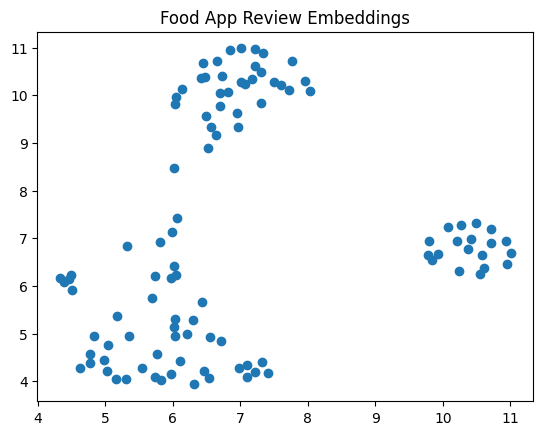

In [ ]:
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title("Food App Review Embeddings")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_cluster = 3
kmeans = KMeans(n_clusters=num_cluster)
cluster_labels = kmeans.fit_predict(embeddings_2d)

In [ ]:
data['cluster_label'] = cluster_labels

In [ ]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,1
1,Im pretty sure they had a wall made of recycle...,2
2,Dude Im not even mad they were late. Food arri...,1
3,Chhole bhature yaar! Sunday indulgence crispy ...,0
4,The place had a vibe but I cant quite put my f...,2
...,...,...
96,Food arrived. I had a taste. Pretty standard.,1
97,Food was delivered. I ate. Cant complain.,1
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,0
99,Ugh it was so cozy you wouldnt believe. I mean...,2


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

cluster_df  = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence':data['Review']
})


fig = px.scatter (
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Review',
    labels = {'label': 'Cluster'},
    width = 800,
    height = 600

)

fig.update_traces(
    marker=dict(size=8)
)

fig.update_layout(
    plot_bgcolor = 'white'
)

fig.show()

In [ ]:
reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings)

In [ ]:

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)



In [ ]:
data['cluster_label'] = cluster_labels

In [ ]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,1
1,Im pretty sure they had a wall made of recycle...,0
2,Dude Im not even mad they were late. Food arri...,1
3,Chhole bhature yaar! Sunday indulgence crispy ...,0
4,The place had a vibe but I cant quite put my f...,0
...,...,...
96,Food arrived. I had a taste. Pretty standard.,1
97,Food was delivered. I ate. Cant complain.,1
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,0
99,Ugh it was so cozy you wouldnt believe. I mean...,0


In [ ]:
cluster_df = pd.DataFrame({
      'x': embeddings_3d[:,0],
      'y': embeddings_3d[:,1],
      'z': embeddings_3d[:,2],
      'label':cluster_labels,
      'sentence': data['Review']
    }
)


fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Review',
    labels =  { 'label':'Cluster' }
)


fig.update_traces(
    marker=dict(size=5)
)

fig.show()

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



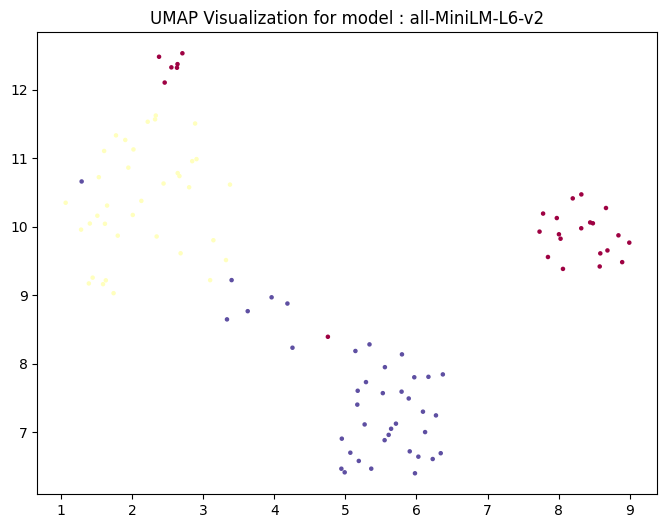

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



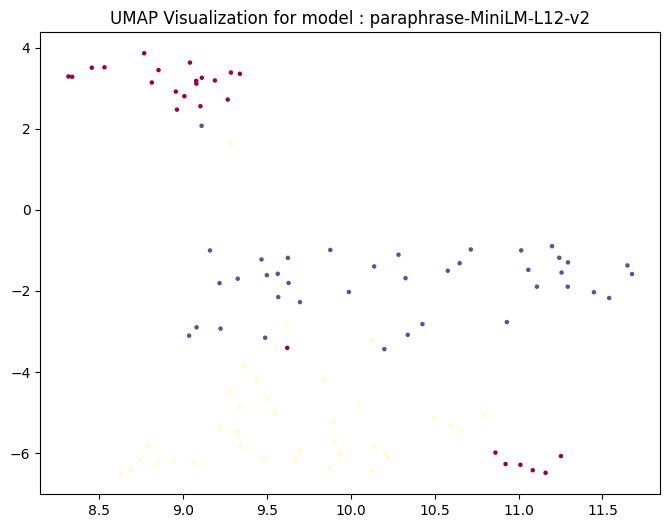

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



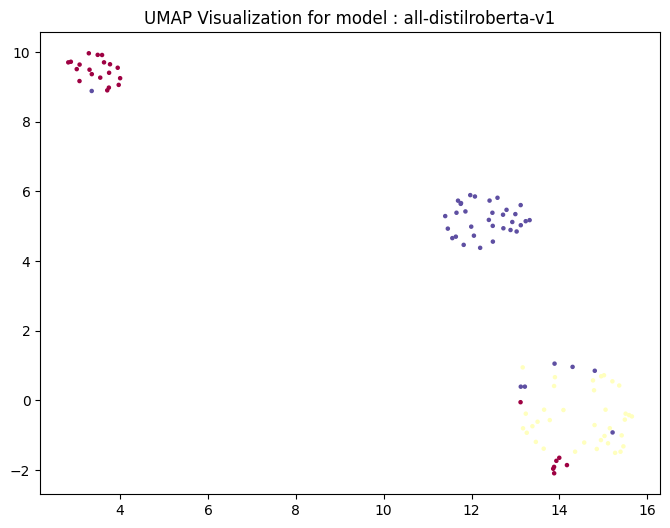

In [ ]:
from sentence_transformers import SentenceTransformer

models = ['all-MiniLM-L6-v2', 'paraphrase-MiniLM-L12-v2', 'all-distilroberta-v1']

model_embeddings = {}


for model_name in models:
  model = SentenceTransformer(model_name)
  model_embeddings[model_name] = model.encode(reviews, show_progress_bar=True)

  umap_instance = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
  embeddings_umap = umap_instance.fit_transform(model_embeddings[model_name])


  plt.figure(figsize=(8,6))
  plt.scatter(embeddings_umap[:,0], embeddings_umap[:,1], c=cluster_labels, cmap="Spectral", s=5)
  plt.title(f"UMAP Visualization for model : {model_name}")
  plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



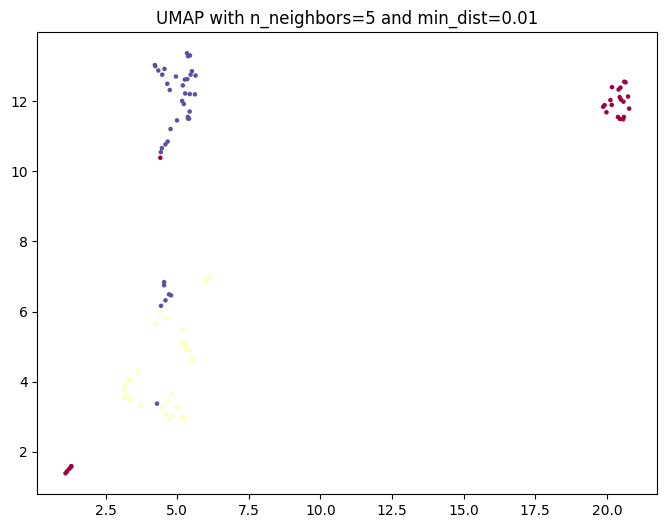

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



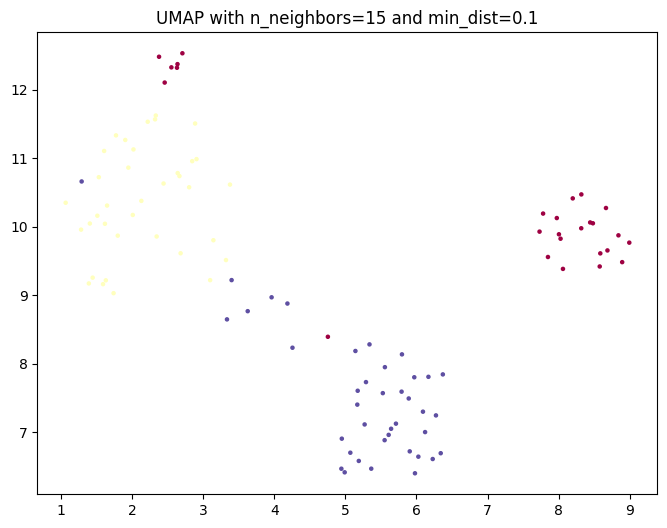

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



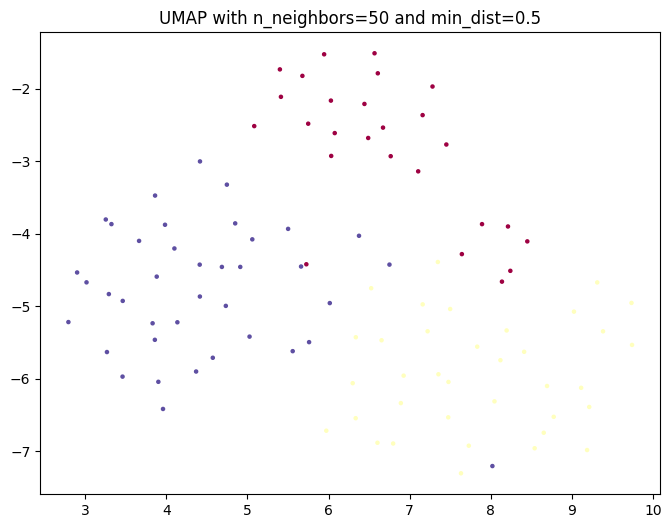

In [ ]:
from umap import UMAP
umap_variants = [
    {'n_neighbors': 5, 'min_dist': 0.01},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 50, 'min_dist': 0.5},
]


for params in umap_variants:
    umap_instance = UMAP(n_neighbors=params['n_neighbors'], min_dist=params['min_dist'], random_state=42)
    embeddings_umap = umap_instance.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cluster_labels, cmap='Spectral', s=5)
    plt.title(f"UMAP with n_neighbors={params['n_neighbors']} and min_dist={params['min_dist']}")
    plt.show()


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(reviews)  # Assuming 'sentences' contains the original text data


for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = [reviews[i] for i in cluster_indices]
    cluster_counts = Counter(" ".join(cluster_texts).split())

    print(f"Cluster {cluster_id}:")
    print(cluster_counts.most_common(10))
    print("-" * 50)

Cluster 0:
[('like', 21), ('was', 20), ('a', 15), ('it', 12), ('I', 10), ('were', 9), ('the', 8), ('in', 7), ('and', 6), ('Biryani', 6)]
--------------------------------------------------
Cluster 1:
[('was', 11), ('like', 9), ('food', 9), ('Paneer', 6), ('masala', 5), ('a', 5), ('vibes', 5), ('Spicy', 5), ('tikka', 5), ('for', 4)]
--------------------------------------------------
Cluster 2:
[('I', 18), ('a', 17), ('was', 15), ('Food', 10), ('the', 8), ('like', 7), ('but', 7), ('they', 6), ('my', 6), ('Not', 6)]
--------------------------------------------------


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)


lda = LatentDirichletAllocation(n_components=5, random_state=42)


for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = [reviews[i] for i in cluster_indices]

    if len(cluster_texts) > 0:
        tfidf_cluster = tfidf_vectorizer.transform(cluster_texts)
        lda.fit(tfidf_cluster)

        print(f"Topics for Cluster {cluster_id}:")
        for idx, topic in enumerate(lda.components_):
            print(f"Topic {idx}: ", [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
        print("-" * 50)


Topics for Cluster 0:
Topic 0:  ['blurry', 'bowties', 'man', 'okay', 'like']
Topic 1:  ['stepping', 'future', 'telling', 'like', 'im']
Topic 2:  ['unicorn', 'vibe', 'like', 'place', 'disco']
Topic 3:  ['gold', 'place', 'clue', 'thought', 'walked']
Topic 4:  ['lighting', 'flavor', 'spices', 'biryani', 'like']
--------------------------------------------------
Topics for Cluster 1:
Topic 0:  ['street', 'bhaji', 'like', 'mouth', 'pav']
Topic 1:  ['fast', 'bhature', 'tikka', 'masala', 'rolls']
Topic 2:  ['awesome', 'style', 'crunchy', 'desi', 'paneer']
Topic 3:  ['creamy', 'bland', 'avo', 'paneer', 'tikka']
Topic 4:  ['dude', 'vibes', 'desi', 'tangy', 'spicy']
--------------------------------------------------
Topics for Cluster 2:
Topic 0:  ['happened', 'special', 'waiting', 'like', 'delivery']
Topic 1:  ['arrived', 'delivery', 'ordered', 'food', 'ate']
Topic 2:  ['epic', 'snack', 'delivery', 'food', 'waiting']
Topic 3:  ['hit', 'smells', 'stepped', 'food', 'late']
Topic 4:  ['needed', 'g

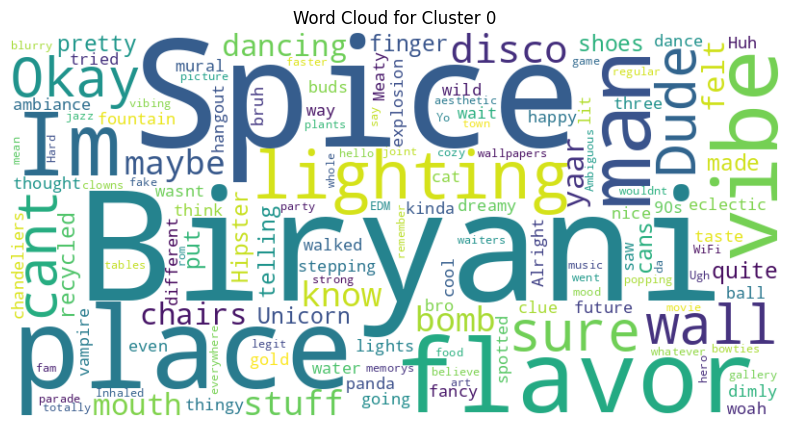

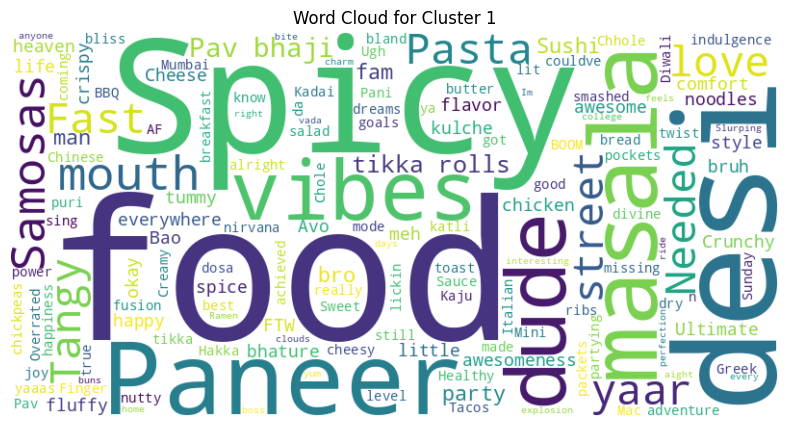

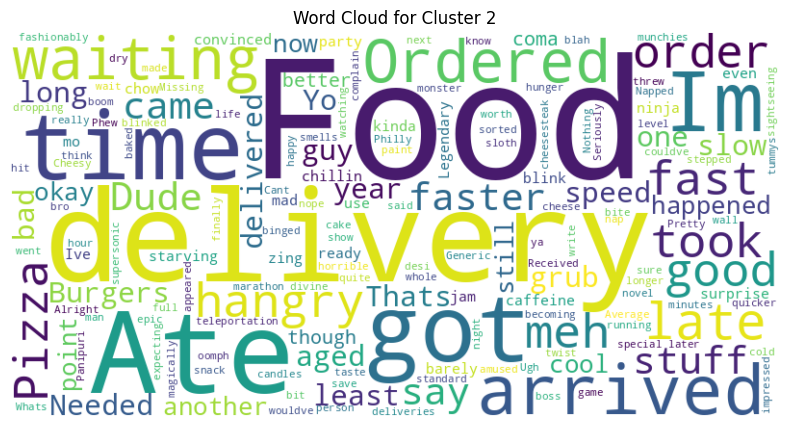

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = " ".join([reviews[i] for i in cluster_indices])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()